**Objective**: Find the Optimal Value for the Standard Deviation of the Reservoir Weight Distribution under which exploration is best.

In [3]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
from parameters import Params
from simulation import Simulation
from tqdm import tqdm
from agent import ReservoirAgent

folder = 'standard_deviation_study'
params = Params.from_json('parameters.json')

if params.agent != ReservoirAgent:
    raise ValueError("This script is designed for reservoir agents only.")

std_range = list(np.arange(0.02, 0.05, 0.0005))
reservoir_sizes = [2000, 1000, 500, 100]

data = []

for size in reservoir_sizes:
    params.num_neurons = size
    fitness_values = []
    
    for std in tqdm(std_range, position=0):
        params.standard_deviation = std
        sim = Simulation(params, params.agent)
        fitness_values.append(np.mean(sim.run(folder), axis=(0,1)))
    
    data.append(fitness_values)

100%|██████████| 60/60 [12:50<00:00, 12.85s/it]


In [4]:
fitnesses_brownian = []
fitnesses_levy = []
fitnesses_ballistic = []

for _ in range(10):
    # BROWNIAN
    from agent import BrownianAgent
    params.type = 'brownian'
    params.agent = BrownianAgent
    sim = Simulation(params, params.agent)
    fitnesses_brownian.append(np.mean(sim.run(folder)))

    # LÉVY
    from agent import LévyAgent
    params.type = 'levy'
    params.agent = LévyAgent
    sim = Simulation(params, params.agent)
    fitnesses_levy.append(np.mean(sim.run(folder)))

    # BALLISTIC
    from agent import BallisticAgent
    params.type = 'ballistic'
    params.agent = BallisticAgent
    sim = Simulation(params, params.agent)
    fitnesses_ballistic = np.mean(sim.run(folder))

fitness_brownian = np.mean(fitnesses_brownian)
fitness_levy = np.mean(fitnesses_levy)
fitness_ballistic = np.mean(fitnesses_ballistic)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:11<00:00,  2.36s/it]


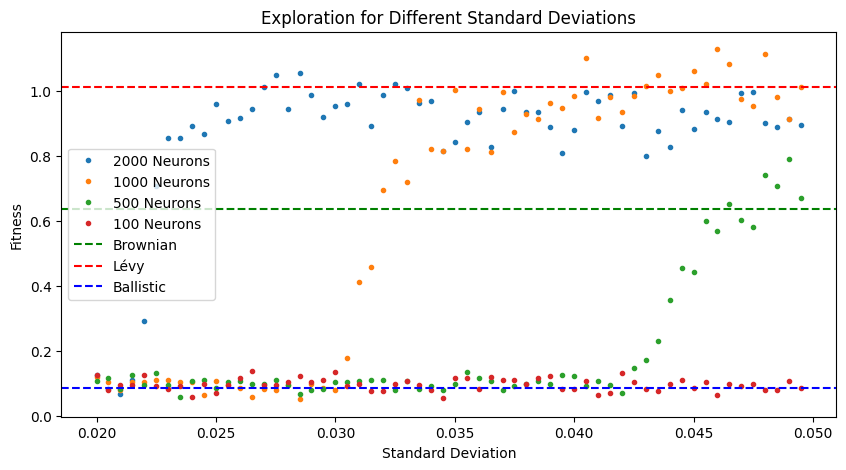

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
window = 10

for i in range(len(data)):
    plt.plot(std_range, data[i], '.', label=f'{reservoir_sizes[i]} Neurons')

plt.axhline(y=fitness_brownian, color='g', linestyle='--', label='Brownian')
plt.axhline(y=fitness_levy, color='r', linestyle='--', label='Lévy')
plt.axhline(y=fitness_ballistic, color='b', linestyle='--', label='Ballistic')
plt.legend()
plt.xlabel('Standard Deviation')
plt.ylabel('Fitness')
plt.title('Exploration for Different Standard Deviations')
plt.show()